### Modelos No Supervisados

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
iris_dataset = load_iris()

In [3]:
iris = pd.DataFrame(
    iris_dataset.data,
    columns = iris_dataset.feature_names
)

In [4]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
pca = PCA(n_components= 2)
pca_components_v0 = pd.DataFrame(pca.fit_transform(iris), columns= ["pc1", "pc2"])

In [6]:
pca_components_v0

,pc1,pc2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [7]:
pca.explained_variance_ratio_ # cuanta varianza recoge cada componente

array([0.92461872, 0.05306648])

In [8]:
np.sum(pca.explained_variance_ratio_)*100

np.float64(97.76852063187977)

In [9]:
k_means = KMeans(n_clusters=2)
cluster_labels = k_means.fit_predict(pca_components_v0)
pca_components_v0["cluster"] = cluster_labels

In [10]:
pca_components_v0

,pc1,pc2,cluster
0,-2.684126,0.319397,1
1,-2.714142,-0.177001,1
2,-2.888991,-0.144949,1
3,-2.745343,-0.318299,1
4,-2.728717,0.326755,1
...,...,...,...
145,1.944110,0.187532,0
146,1.527167,-0.375317,0
147,1.764346,0.078859,0
148,1.900942,0.116628,0


<Axes: xlabel='pc1', ylabel='pc2'>

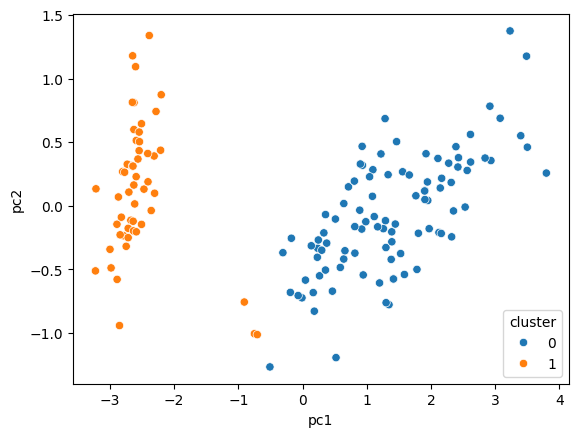

In [11]:
sns.scatterplot(x="pc1", y="pc2", hue = "cluster", data = pca_components_v0)

In [12]:
k_means.cluster_centers_

array([[ 1.38640101, -0.06980433],
       [-2.53737542,  0.12775509]])